# Read phytoplankton data and add functional group info

In [ ]:
library(tidyverse, warn.conflicts = FALSE)
library(cowplot, warn.conflicts = FALSE)
library(scales, warn.conflicts = FALSE)

# library to read matlab data formats into R
library(reshape2)
library(lubridate)

In [ ]:
wind_ds <- read.csv("ERA5_reanalyisis_monthly.csv")

In [5]:
ds <- read.csv("../VeryNEWESTCariacoData/phytoplankton.csv")

ds$Datetime_UTC = parse_date_time(ds$Datetime_UTC, orders = "%Y-%m-%d H:M:S")
ds$Datetime_local = parse_date_time(ds$Datetime_local, orders = "%Y-%m-%d H:M:S")

ds$date = ds$Datetime_UTC

## now read Functional Group annotated csv

In [6]:
annotated_fg <- read.csv("worms_dat_annotated_OLDFUNCGROUP.csv", sep=";", dec=',', stringsAsFactor=FALSE)
#annotated_fg = annotated_fg[complete.cases(annotated_fg),]

# trim dataframe to relevant columns
AphiaID2FG <- data.frame("AphiaID" = annotated_fg$AphiaID, 
                         "FuncGroup"=as.character(annotated_fg$functionalgroup_old), 
                         stringsAsFactors=FALSE)

## and merge with ds by AphiaID

In [7]:
ds_FG <- merge(ds, AphiaID2FG, all=TRUE)

In [8]:
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "nanoflagellates"]   <- "NANOFLAGELLATES"
ds_FG$FuncGroup[ds_FG$ScientificName_accepted == "palmelloid colony"] <- "PALMELLOIDCOLONY"

# Now let's plot some raw counts:

Warning message:
“Removed 1 rows containing missing values (geom_point).”

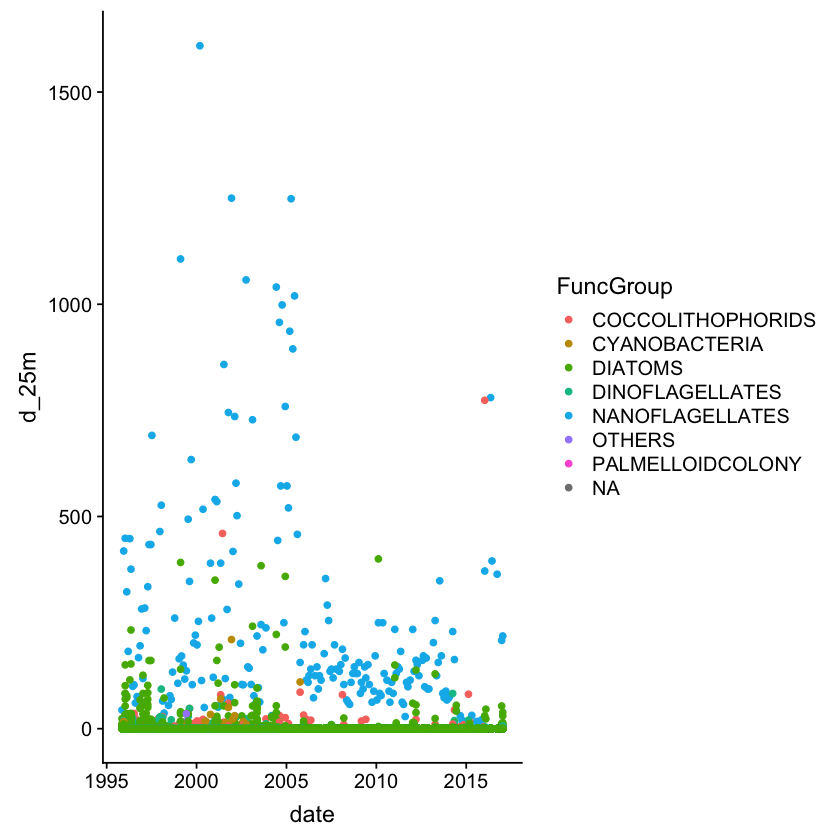

In [9]:
ggplot(data=ds_FG, aes(x=date, y=d_25m, color=FuncGroup)) + geom_point()

# save code: